In [2]:
#Circuit Breaker Pattern

#Imagine a microservice calling another microservice downstream. To avoid cascading failures,
#a circuit breaker monitors failures and trips open when failures exceed a threshold.

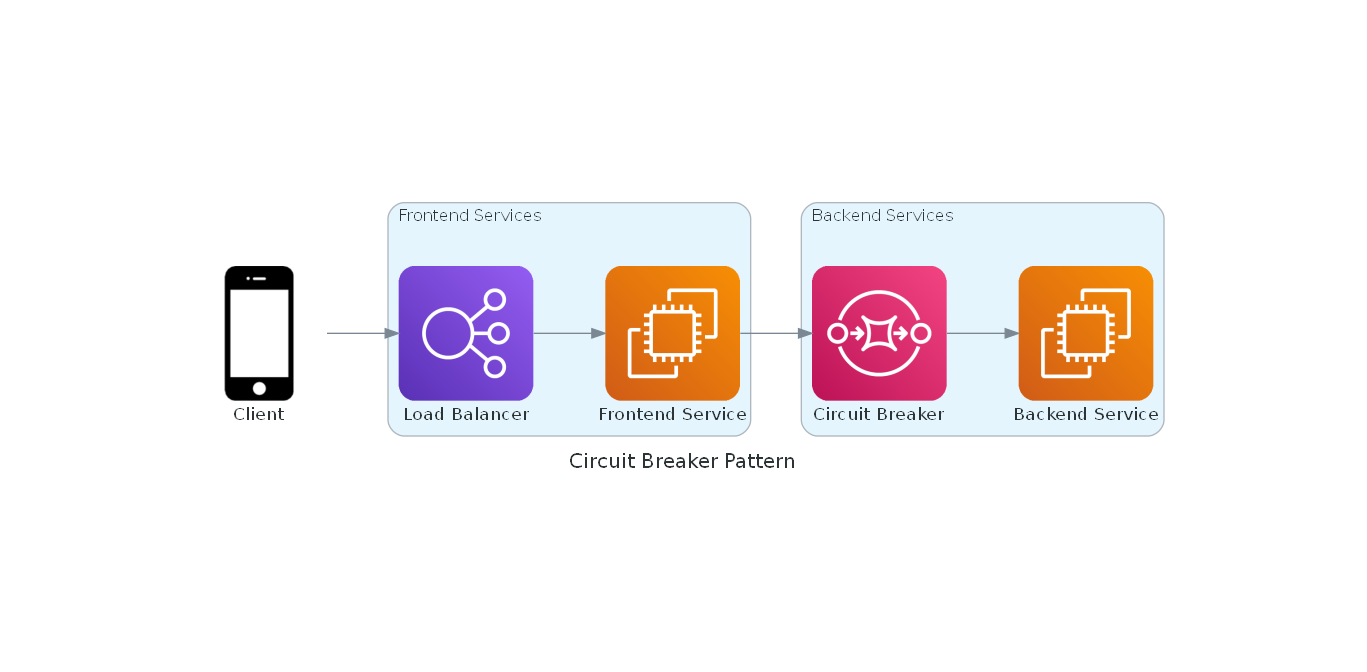

In [5]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.integration import SQS
from diagrams.generic.device import Mobile
from IPython.display import Image

with Diagram("Circuit Breaker Pattern", filename="circuit_breaker_pattern", show=False, outformat="png"):

    client = Mobile("Client")

    with Cluster("Frontend Services"):
        lb = ELB("Load Balancer")
        frontend_service = EC2("Frontend Service")

    with Cluster("Backend Services"):
        circuit_breaker = SQS("Circuit Breaker")
        backend_service = EC2("Backend Service")

    client >> lb >> frontend_service >> circuit_breaker >> backend_service
Image("circuit_breaker_pattern.png")

In [6]:
# Cache-Aside Pattern Visualization

# Application code explicitly reads/writes to cache and database.
# On cache miss, app loads data from DB and populates cache.
# On write/update, app updates DB and invalidates or updates cache.
# Helps keep cache consistent with DB.

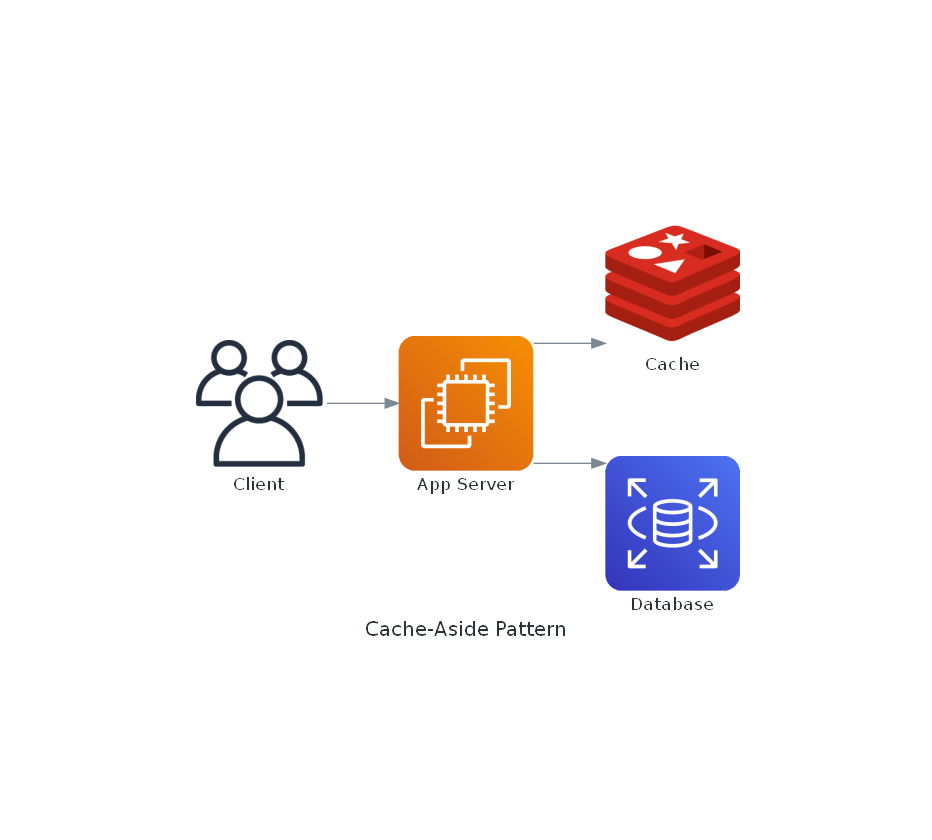

In [7]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.client import Users
from IPython.display import Image

with Diagram("Cache-Aside Pattern", filename="cache_aside_pattern", show=False, outformat="png"):

    user = Users("Client")
    app = EC2("App Server")
    cache = Redis("Cache")
    db = RDS("Database")

    user >> app
    app >> cache
    app >> db
Image("cache_aside_pattern.png")

In [8]:
# Bulkhead Pattern
# Isolates components or resources to limit failure impact.

# Like watertight compartments on a ship — if one fails, others stay unaffected.

# Improves system resilience and fault tolerance.



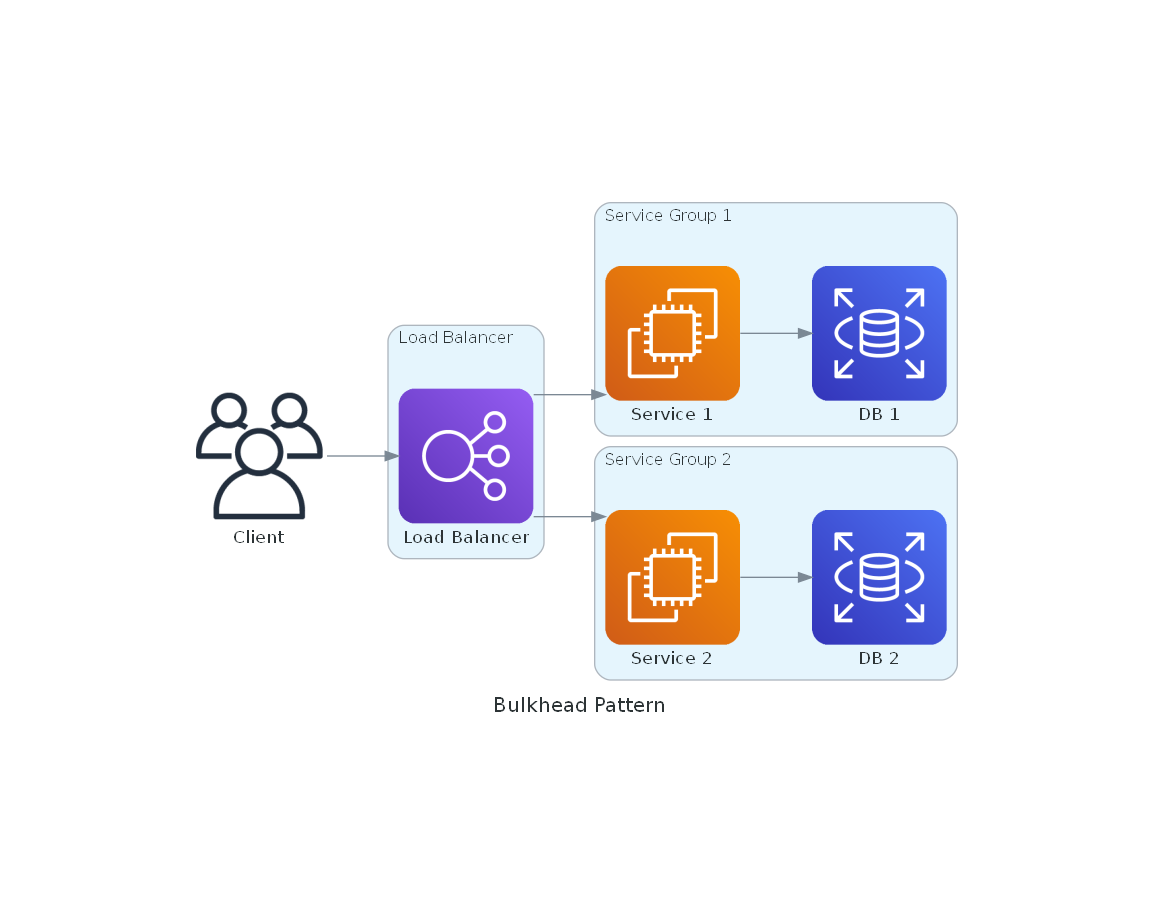

In [9]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.database import RDS
from diagrams.onprem.client import Users
from IPython.display import Image

with Diagram("Bulkhead Pattern", filename="bulkhead_pattern", show=False, outformat="png"):

    user = Users("Client")

    with Cluster("Load Balancer"):
        lb = ELB("Load Balancer")

    with Cluster("Service Group 1"):
        service1 = EC2("Service 1")
        db1 = RDS("DB 1")

    with Cluster("Service Group 2"):
        service2 = EC2("Service 2")
        db2 = RDS("DB 2")

    user >> lb
    lb >> service1
    lb >> service2
    service1 >> db1
    service2 >> db2
Image("bulkhead_pattern.png")

In [10]:
# CQRS (Command Query Responsibility Segregation) & Event Sourcing

# 🎯What is CQRS?
# Separate write operations (Commands) from read operations (Queries).

# Writes and reads can use different models or databases optimized for each.

# Improves scalability and performance especially in complex domains.

# 🎯 What is Event Sourcing?
# Instead of storing just current state, store all state changes as events.

# System state can be rebuilt by replaying these events.

# Helps with audit logs, temporal queries, and fault recovery.

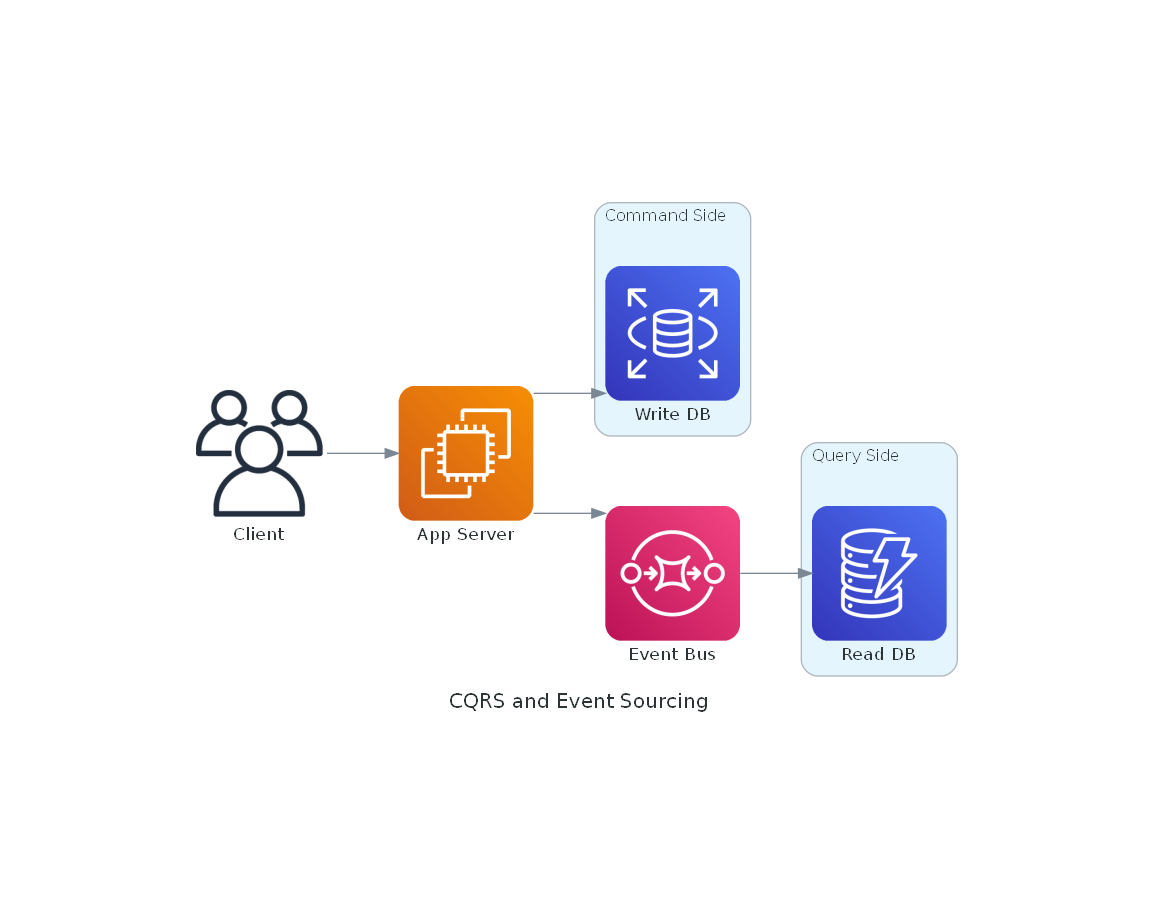

In [11]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.database import Dynamodb
from diagrams.aws.integration import SQS
from diagrams.onprem.client import Users
from IPython.display import Image

with Diagram("CQRS and Event Sourcing", filename="cqrs_event_sourcing", show=False, outformat="png"):

    user = Users("Client")
    app = EC2("App Server")

    with Cluster("Command Side"):
        command_db = RDS("Write DB")

    with Cluster("Query Side"):
        query_db = Dynamodb("Read DB")

    event_bus = SQS("Event Bus")

    user >> app
    app >> command_db
    app >> event_bus
    event_bus >> query_db
Image("cqrs_event_sourcing.png")